In [1]:
from PyCrypto.Strategy import *
from PyCrypto.FetchPrices import *

In [2]:
buy_factor = 0.001
sell_factor = 100

# The initial amount of source currency available
initial_available_money = 1000
# The initial amount of destination currency available
initial_currency_amt = 0

### Get historical data for simulation

In [21]:
df = minute_price_historical('NEBL', 'ETH', limit = 60*24*7, aggregate = 1)
import datetime
now = datetime.datetime.now()

### Run the simulation 

In [22]:
import numpy as np
def Simulate(df, buy_factor, sell_factor, start_minutes_ago = 60*12, end_minutes_ago = 0, step_minutes = 1):
    
    # Generate range of minutes and times to run simulation
    minutes_range = range(start_minutes_ago,end_minutes_ago-1,-step_minutes)
    datetime_range = [now - datetime.timedelta(minutes=minutes_ago) for minutes_ago in minutes_range]
    
    # Compute trend statistics for each simulation time
    results = [list(trend_stats(df, current_time = dt)) for dt in datetime_range]
    
    # Initialize arrays
    dim = [len(results)+1, 1]
    current_currency_amt = np.empty(dim)
    available_money = np.empty(dim)
    current_potential_money = np.empty(dim)
    currency_cost = np.empty(dim)
    decisions = np.empty(dim)

    current_currency_amt[0] = initial_currency_amt
    available_money[0] = initial_available_money
    current_potential_money[0] = initial_available_money + initial_currency_amt*df.loc[0,'open']
    currency_cost[0] = df.loc[0,'open']
    
    # Run simulation
    for i, minutes_ago in enumerate(minutes_range):
        dec = decision(current_currency_amt[i], available_money[i]/df.loc[i, 'open'], *results[i], buy_factor = buy_factor, sell_factor = sell_factor)
        decisions[i+1] = dec
        current_currency_amt[i+1] = current_currency_amt[i] + dec 
        available_money[i+1] = available_money[i] - dec*df.loc[i, 'open'] 
        currency_cost[i+1] = df.loc[i, 'open']
        current_potential_money[i+1] = available_money[i]+current_currency_amt[i]*df.loc[i, 'open']
    
    return (datetime_range, current_currency_amt, available_money, currency_cost, current_potential_money, decisions)

### Run a test simulation and show results

In [23]:
(datetime_range, current_currency_amt, available_money, currency_cost, current_potential_money, decisions) = Simulate(df, buy_factor = 1, sell_factor = 1)

In [24]:
# Build results dataframe
simul=pd.DataFrame( {'Value': current_potential_money.T[0,:-1], 'Available money': available_money.T[0,:-1], 'Currency amt': current_currency_amt.T[0,:-1], 'Currency price': currency_cost.T[0,:-1], 'Decision': decisions.T[0,:-1]}, index=datetime_range)

In [26]:
simul

,Available money,Currency amt,Currency price,Decision,Value
2018-01-09 02:23:29.779273,1000.000000,0.000000,0.02111,0.000000,1000.000000
2018-01-09 02:24:29.779273,1000.000000,0.000000,0.02111,0.000000,1000.000000
2018-01-09 02:25:29.779273,998.335895,78.830197,0.02111,78.830197,1000.000000
2018-01-09 02:26:29.779273,996.398339,170.613961,0.02111,91.783764,1000.000000
2018-01-09 02:27:29.779273,994.166638,276.331674,0.02111,105.717712,1000.000000
2018-01-09 02:28:29.779273,991.945506,381.548751,0.02111,105.217077,1000.000000
2018-01-09 02:29:29.779273,989.823663,473.403426,0.02310,91.854676,1000.759282
2018-01-09 02:30:29.779273,987.861275,557.662256,0.02329,84.258830,1000.849229
2018-01-09 02:31:29.779273,986.106613,637.202684,0.02206,79.540427,1000.163304
2018-01-09 02:32:29.779273,984.738417,696.767165,0.02297,59.564481,1000.743159


### Run a grid search of simulation parameters

#### Define set of currencies to optimize on

In [27]:
source_currency = 'ETH'
dest_currencies = ['NEBL', 'LRC', 'ZRX', 'BAT', 'LUN', 'XLM', 'CND', 'XRP', 'TRIG']

In [29]:
from multiprocessing import Pool
import os

In [ ]:
buy_factors = np.logspace(-3, 3, 7)
sell_factors = np.logspace(-3, 2, 6)

def SimulateCurrency(dest_currency, source_currency, buy_factor, sell_factor, limit = 60*48, aggregate = 1):
    print("Simulating for destination currency {0}, source currency {1}, buy_factor {2}, sell_factor {3}".format(dest_currency, source_currency, buy_factor, sell_factor))
    df = minute_price_historical(dest_currency, source_currency, limit, aggregate)
    return Simulate(df, buy_factor, sell_factor)
#if __name__ == '__main__':
#    with Pool() as pool:                         # Create a multiprocessing Pool of available cpus
#        results = np.array([[[pool.starmap(SimulateCurrency,(dest, source_currency, b, s)) for dest in dest_currencies] for b in buy_factors] for s in sell_factors])
sim_results = np.array([[[SimulateCurrency(dest, source_currency, b, s) for dest in dest_currencies] for b in buy_factors] for s in sell_factors])

Simulating for destination currency NEBL, source currency ETH, buy_factor 0.001, sell_factor 0.001
Simulating for destination currency LRC, source currency ETH, buy_factor 0.001, sell_factor 0.001
Simulating for destination currency ZRX, source currency ETH, buy_factor 0.001, sell_factor 0.001
Simulating for destination currency BAT, source currency ETH, buy_factor 0.001, sell_factor 0.001
Simulating for destination currency LUN, source currency ETH, buy_factor 0.001, sell_factor 0.001
Simulating for destination currency XLM, source currency ETH, buy_factor 0.001, sell_factor 0.001
Simulating for destination currency CND, source currency ETH, buy_factor 0.001, sell_factor 0.001
Simulating for destination currency XRP, source currency ETH, buy_factor 0.001, sell_factor 0.001
Simulating for destination currency TRIG, source currency ETH, buy_factor 0.001, sell_factor 0.001
Simulating for destination currency NEBL, source currency ETH, buy_factor 0.01, sell_factor 0.001


In [12]:
# Save the simulation results
import pickle
with open(file='SimulationResults.pkl',mode='wb') as f:
    pickle.dump(file=f,obj=sim_results)

In [ ]:
# Load the simulation results
reload = False

import pickle
if reload:
    with open(file='SimulationResults.pkl',mode='rb') as f:
        sim_results = pickle.load(file=f)

In [13]:
value_gains = np.array([[np.mean([sim_results[j, i, c, 4][-2]-sim_results[j, i, c, 4][0] for c in range(len(dest_currencies))]) for i in range(len(buy_factors))] for j in range(len(sell_factors))])

In [14]:
value_gains

array([[ -1.70466604e-03,  -1.73077050e-02,  -1.73192312e-01,
         -1.67197486e+00,  -1.30910545e+01,  -3.07575816e+01,
         -4.50101534e+01],
       [ -2.08010886e-03,  -2.07937625e-02,  -1.65626313e-01,
         -1.59797708e+00,  -1.47939729e+01,  -3.53563517e+01,
         -4.06984303e+01],
       [ -1.98138436e-03,  -2.12996479e-02,  -1.97495591e-01,
         -1.90949400e+00,  -1.22155133e+01,  -3.15786671e+01,
         -4.75915379e+01],
       [ -1.98478121e-03,  -1.49537106e-02,  -1.55210594e-01,
         -1.44783957e+00,  -1.07633769e+01,  -3.21666068e+01,
         -4.93454266e+01],
       [ -1.47808648e-03,  -1.54956450e-02,  -1.33313429e-01,
         -1.13113891e+00,  -9.53626700e+00,  -3.24084285e+01,
         -4.51731518e+01],
       [ -1.86306306e-04,  -1.87895745e-03,  -1.87737298e-02,
         -1.91038992e-01,  -1.75246380e+00,  -9.53421962e+00,
         -1.41093696e+01]])

### Find best parameters and show best results

In [15]:
(best_j, best_i) = np.unravel_index(value_gains.argmax(), value_gains.shape)

In [20]:
buy_factors[best_j]

100.0

In [17]:
(datetime_range, current_currency_amt, available_money, currency_cost, current_potential_money, decisions) = results[best_j, best_i, 0]
best_results=pd.DataFrame( {'Value': current_potential_money.T[0,:-1], 'Available money': available_money.T[0,:-1], 'Currency amt': current_currency_amt.T[0,:-1], 'Currency price': currency_cost.T[0,:-1], 'Decision': decisions.T[0,:-1]}, index=datetime_range)

In [18]:
best_results

,Available money,Currency amt,Currency price,Decision,Value
2018-01-09 00:21:48.977512,1000.000000,0.000000,0.07187,7.450794e-312,1000.000000
2018-01-09 00:22:48.977512,1000.000000,0.000000,0.07187,-0.000000e+00,1000.000000
2018-01-09 00:23:48.977512,1000.000000,0.000000,0.07200,0.000000e+00,1000.000000
2018-01-09 00:24:48.977512,1000.000000,0.000000,0.07239,0.000000e+00,1000.000000
2018-01-09 00:25:48.977512,1000.000000,0.000000,0.07269,0.000000e+00,1000.000000
2018-01-09 00:26:48.977512,1000.000000,0.000000,0.07208,0.000000e+00,1000.000000
2018-01-09 00:27:48.977512,1000.000000,0.000000,0.07246,0.000000e+00,1000.000000
2018-01-09 00:28:48.977512,1000.000000,0.000000,0.07274,0.000000e+00,1000.000000
2018-01-09 00:29:48.977512,1000.000000,0.000000,0.07281,0.000000e+00,1000.000000
2018-01-09 00:30:48.977512,1000.000000,0.000000,0.07242,0.000000e+00,1000.000000


### Plot results

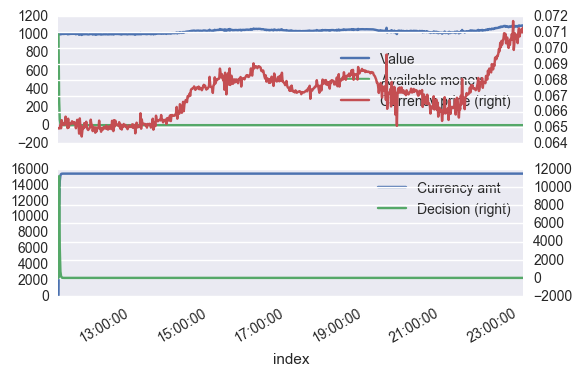

In [50]:
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
ax1.tick_params(labelbottom='off', bottom='on')
best_results.reset_index().plot(x='index', y = ['Value', 'Available money', 'Currency price'], secondary_y = ['Currency price'], ax = ax1, )
best_results.reset_index().plot(x='index', y = ['Currency amt', 'Decision'], secondary_y = ['Decision'], ax = ax2)